In [26]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [27]:
df = pd.read_csv('car-sales.csv')
df.shape

(23906, 16)

In [28]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [30]:
df.Gender.describe()

count     23906
unique        2
top        Male
freq      18798
Name: Gender, dtype: object

In [31]:
df[df.Gender == 'Male']['Annual Income'].mean(), df[df.Gender == 'Male']['Annual Income'].median()

(851184.0442068306, 760000.0)

In [32]:
df[df.Gender == 'Female']['Annual Income'].mean(), df[df.Gender == 'Female']['Annual Income'].median()

(755973.021339076, 665000.0)

In [33]:
df['Annual Income'].describe()

count    2.390600e+04
mean     8.308403e+05
std      7.200064e+05
min      1.008000e+04
25%      3.860000e+05
50%      7.350000e+05
75%      1.175750e+06
max      1.120000e+07
Name: Annual Income, dtype: float64

In [34]:
df['Annual Income in thousands'] = df['Annual Income'] / 1000
df['Annual Income in thousands'].describe()

count    23906.000000
mean       830.840285
std        720.006395
min         10.080000
25%        386.000000
50%        735.000000
75%       1175.750000
max      11200.000000
Name: Annual Income in thousands, dtype: float64

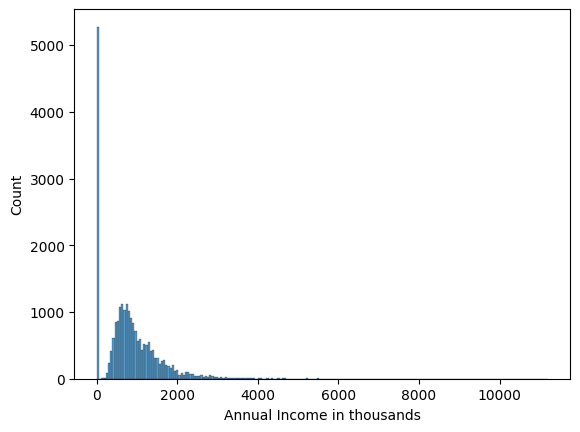

In [35]:
sb.histplot(df['Annual Income in thousands'])

plt.show()

In [36]:
mean = df['Annual Income in thousands'].mean()
std = df['Annual Income in thousands'].std()

df['Annual Income ($k) z-score'] = (df['Annual Income in thousands'] - mean) / std
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Annual Income in thousands,Annual Income ($k) z-score
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,13.5,-1.135185
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,1480.0,0.901603
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,1035.0,0.283553
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,13.5,-1.135185
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,1465.0,0.880770


In [37]:
outliers_z_score = df[(df['Annual Income ($k) z-score'] < -3) | (df['Annual Income ($k) z-score'] > 3)]

outliers_z_score.shape

(336, 18)

In [38]:
def get_MAD(series, median):
    diff = abs(series - median)
    MAD = diff.median()
    return MAD

median = df['Annual Income in thousands'].median()
MAD = get_MAD(df['Annual Income in thousands'], median)

df['Annual Income ($k) modified z-score'] = 0.6745 * (df['Annual Income in thousands'] - median) / MAD

df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Annual Income in thousands,Annual Income ($k) z-score,Annual Income ($k) modified z-score
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,13.5,-1.135185,-1.232030
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,1480.0,0.901603,1.272158
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,1035.0,0.283553,0.512278
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,13.5,-1.135185,-1.232030
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,1465.0,0.880770,1.246544


In [39]:
outliers_modified_z_score = df[(df['Annual Income ($k) modified z-score'] < -3.5) | (df['Annual Income ($k) modified z-score'] > 3.5)]

outliers_modified_z_score.shape

(466, 19)

In [41]:
df_no_income_outliers = df[(df['Annual Income ($k) modified z-score'] > -3.5) & (df['Annual Income ($k) modified z-score'] < 3.5)]

df_no_income_outliers.shape

(23440, 19)

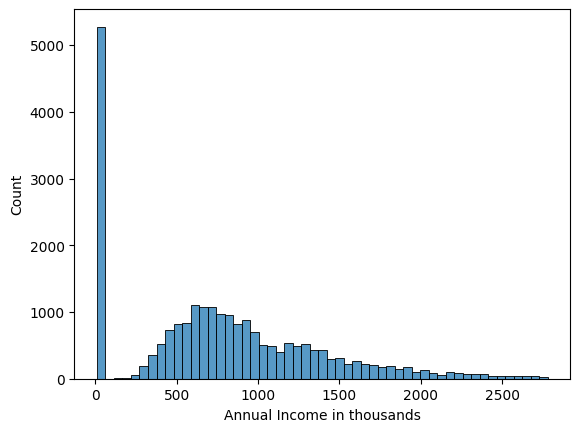

In [42]:
sb.histplot(df_no_income_outliers['Annual Income in thousands'])

plt.show()

In [51]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Annual Income in thousands,Annual Income ($k) z-score,Annual Income ($k) modified z-score
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,13.5,-1.135185,-1.232030
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,1480.0,0.901603,1.272158
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,1035.0,0.283553,0.512278
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,13.5,-1.135185,-1.232030
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,1465.0,0.880770,1.246544


<Axes: xlabel='Annual Income in thousands', ylabel='Price ($)'>

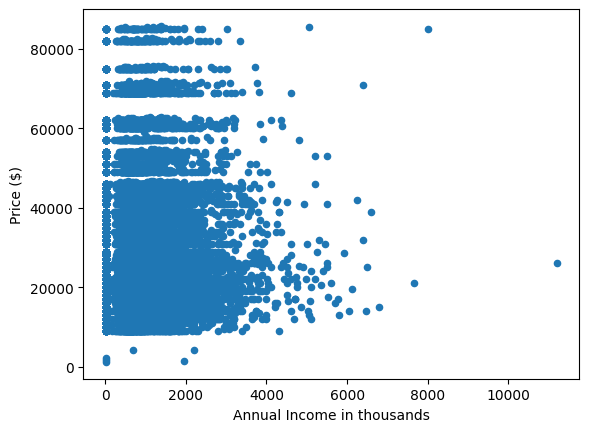

In [65]:
df.plot(kind='scatter', x='Annual Income in thousands', y='Price ($)')

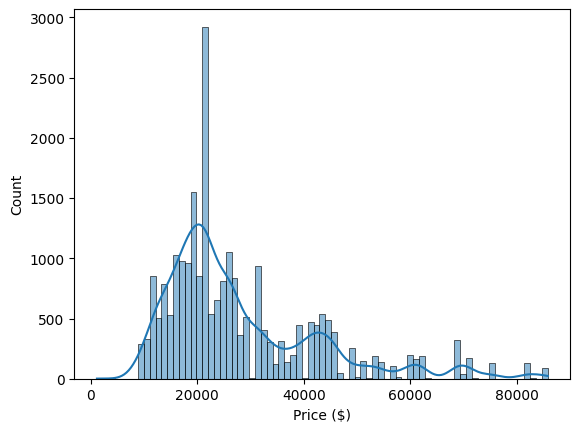

In [67]:
sb.histplot(df['Price ($)'], kde=True)

plt.show()

In [68]:
df['Price ($)'].describe()

count    23906.000000
mean     28090.247846
std      14788.687608
min       1200.000000
25%      18001.000000
50%      23000.000000
75%      34000.000000
max      85800.000000
Name: Price ($), dtype: float64

In [69]:
df['Price ($)'].mean(), df['Price ($)'].median()

(28090.247845729107, 23000.0)

In [70]:
mean = df['Price ($)'].mean()
std = df['Price ($)'].std()

upper_limit = mean + 3*std
lower_limit = mean - 3*std

outliers_z_score = df[(df['Price ($)'] < lower_limit) | (df['Price ($)'] > upper_limit)]

outliers_z_score.shape

(351, 19)

In [ ]:
median = df['Price ($)'].median()

MAD = (abs(df['Price ($)'] - median)).median()



406.76132